In [1]:
#Import Dependencies
import gmaps
import requests
import statistics

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from scipy import stats
from config6 import gkey
from pprint import pprint
from config8 import api_key

###    SET CONFIGURATION INFORMATION 

####    PRINT A SINGLE CITY FOR AN EXAMPLE OF RESPONSE

In [2]:
#Access maps with unique API key
gmaps.configure(gkey)

In [3]:
#Save configuration information (use a city as an example)
city = "Melbourne"

url = 'http://api.waqi.info/feed/' + city + '/?token='

main_url = url + api_key

In [4]:
#Print JSON response
response = requests.get(main_url)
data = response.json()
pprint(data)

{'data': {'aqi': 34,
          'attributions': [{'logo': 'Australia-Victoria.png',
                            'name': 'Environment Protection Authority | EPA '
                                    'Victoria',
                            'url': 'http://epa.vic.gov.au/'},
                           {'name': 'World Air Quality Index Project',
                            'url': 'https://waqi.info/'}],
          'city': {'geo': [-37.8073959, 144.97],
                   'name': 'Melbourne CBD',
                   'url': 'https://aqicn.org/city/australia/melbourne/melbourne-cbd'},
          'debug': {'sync': '2021-03-26T19:23:14+09:00'},
          'dominentpol': 'pm25',
          'forecast': {'daily': {'o3': [{'avg': 10,
                                         'day': '2021-03-24',
                                         'max': 18,
                                         'min': 5},
                                        {'avg': 8,
                                         'day': '2021-03-25

###  SET CONFIGURATION INFORMATION 

In [5]:
#Save config information
#List of cities
cities = ["Sydney", "Melbourne", "Brisbane", "Perth", "Auckland", "Adelaide", "Gold Coast", "Newcastle", "Canberra", "Honolulu",
          "Christchurch", "Port Moresby", "Sunshine Coast", "Central Coast", "Wollongong", "Geelong", "Hobart", "Wellington", 
          "Townsville", "Nouméa", "Hamilton", "Cairns", "Tauranga", "Toowoomba", "Papeete", "Darwin", "Lower Hutt", "Ballarat",
          "Dunedin", "Bendigo", "Lae", "Albury–Wodonga", "Launceston", "Suva", "Honiara", "Palmerston North", "Mackay"]

In [6]:
#Set up lists to hold reponse information
lat_lon = []
aqi = []
co = []
h = []
o3 = []
so2 = []
pm25 = []
pm10 = []

In [7]:
#Loop through all the cities collecting data for the lists created
for city in cities:
    response = requests.get('http://api.waqi.info/feed/' + city + '/?token=' + api_key).json()
    try:
        #Collect response and add to corresponding empty list
        lat_lon.append(response['data']['city']['geo'])
        print(f"{city}'s latitude & longitude found! Appending stats")
    except:
        #If there is no data, replace with the value = 0
        lat_lon.append("0")
        print("Data not found")
        #Move on with the loop until the list is complete
        pass

for city in cities:
    response = requests.get('http://api.waqi.info/feed/' + city + '/?token=' + api_key).json()
    try:
        aqi.append(response['data']['aqi'])
        print(f"{city}'s AQI found! Appending stats")
    except:
        aqi.append("0")           
        print("Data not found")
        pass

for city in cities:
    response = requests.get('http://api.waqi.info/feed/' + city + '/?token=' + api_key).json()
    try:
        co.append(response['data']['iaqi']['co']['v'])
        print(f"{city}'s CO found! Appending stats")
    except:
        co.append("0")
        print("Data not found")
        pass    
    
for city in cities:
    response = requests.get('http://api.waqi.info/feed/' + city + '/?token=' + api_key).json()
    try:
        h.append(response['data']['iaqi']['h']['v'])
        print(f"{city}'s H found! Appending stats")
    except:
        h.append("0")
        print("Data not found")
        pass    
    
for city in cities:
    response = requests.get('http://api.waqi.info/feed/' + city + '/?token=' + api_key).json()
    try:
        o3.append(response['data']['iaqi']['o3']['v'])
        print(f"{city}'s O3 found! Appending stats")
    except:
        o3.append("0")
        print("Data not found")
        pass    
    
for city in cities:
    response = requests.get('http://api.waqi.info/feed/' + city + '/?token=' + api_key).json()
    try:
        so2.append(response['data']['iaqi']['so2']['v'])
        print(f"{city}'s PM2.5 found! Appending stats")
    except:
        so2.append("0")
        print("Data not found")
        pass 
    
for city in cities:
    response = requests.get('http://api.waqi.info/feed/' + city + '/?token=' + api_key).json()
    try:
        pm25.append(response['data']['iaqi']['pm25']['v'])
        print(f"{city}'s PM2.5 found! Appending stats")
    except:
        pm25.append("0")
        print("Data not found")
        pass  

for city in cities:
    response = requests.get('http://api.waqi.info/feed/' + city + '/?token=' + api_key).json()
    try:
        pm10.append(response['data']['iaqi']['pm10']['v'])
        print(f"{city}'s PM10 found! Appending stats")
    except:
        pm10.append("0")
        print("Data not found")
        pass      

Sydney's latitude & longitude found! Appending stats
Melbourne's latitude & longitude found! Appending stats
Brisbane's latitude & longitude found! Appending stats
Perth's latitude & longitude found! Appending stats
Auckland's latitude & longitude found! Appending stats
Adelaide's latitude & longitude found! Appending stats
Gold Coast's latitude & longitude found! Appending stats
Newcastle's latitude & longitude found! Appending stats
Canberra's latitude & longitude found! Appending stats
Honolulu's latitude & longitude found! Appending stats
Christchurch's latitude & longitude found! Appending stats
Data not found
Data not found
Data not found
Wollongong's latitude & longitude found! Appending stats
Geelong's latitude & longitude found! Appending stats
Hobart's latitude & longitude found! Appending stats
Wellington's latitude & longitude found! Appending stats
Townsville's latitude & longitude found! Appending stats
Nouméa's latitude & longitude found! Appending stats
Hamilton's latit

Data not found
Data not found
Data not found
Launceston's PM10 found! Appending stats
Suva's PM10 found! Appending stats
Data not found
Data not found
Mackay's PM10 found! Appending stats


### PRINT RESPONSES 

In [8]:
#Print data collected from the lists created
print(f"The Geolocaton information received is: {lat_lon}")
print(f"The Air Quality Index information received is: {aqi}")
print(f"The concentration of Carbon monoxide is: {co} μg/m3")
print(f"The concentration of Hydrogen is: {h} μg/m3")
print(f"The concentration of Ozone is: {o3} μg/m3")
print(f"The concentration of Sulphur dioxide is: {so2} μg/m3")
print(f"The concentration of Fine particle matter is: {pm25} μg/m3")
print(f"The concentration of Coarse particulate matter is: {pm10} μg/m3")

The Geolocaton information received is: [[-33.872468, 151.213337], [-37.8073959, 144.97], [-27.4848, 153.032], [56.399327, -3.434182], [-36.84742808, 174.7657304], [-34.929051, 138.601092], [-27.9612, 153.402], [-32.93118, 151.7596], [-35.285307, 149.131579], [21.30758, -157.85542], [-43.5473746, 172.6790455], '0', '0', '0', [-34.41706, 150.8873], [-38.17356, 144.3703], [-42.855, 147.315], [-41.29361375, 174.77193174], [-19.2509, 146.807], [-22.278905555556, 166.452925], [43.2500208, -79.8660914], '0', '0', '0', '0', [-12.467003, 130.850577], [-41.21260048, 174.92087073], '0', [-45.86909824, 170.51770311], [-36.7784, 144.300064], '0', '0', [-41.419, 147.124], [36.03392, 138.1074268], '0', '0', [-21.1595, 149.155]]
The Air Quality Index information received is: [21, 34, 35, 5, 23, 38, 999, 41, 19, 30, 43, '0', '0', '0', 22, 13, 1, 44, 25, 8, 9, '0', '0', '0', '0', 19, 12, '0', 14, 6, '0', '0', 5, 30, '0', '0', 22]
The concentration of Carbon monoxide is: [2.3, 0.7, 2.8, '0', '0', 1.3, '

### CREATE A DATA FRAME 

In [9]:
#Create a data frame using created lists
pollution_dict = {
    "City" : cities,
    "Geolocation" : lat_lon,
    "Air Quality Index" : aqi,
    "Carbon Monoxide (μg/m3)" : co,
    "Hydrogen (μg/m3)" : h,
    "Ozone (μg/m3)" : o3,
    "Sulphur Dioxide (μg/m3)" : so2,
    "Fine Particle Matter (μg/m3)" : pm25,
    "Coarse Particulate Matter (μg/m3)" : pm10,
}

pollution_df = pd.DataFrame(pollution_dict)

In [10]:
# Filter out those rows which does not contain any data 
pollution_df = pollution_df.dropna(how = 'all') 

### SET INDEX FOR DATA FRAME AS RANKING  

In [11]:
#The original dataframe had an index, so re-arrange the index to represent ranking 
pollution_df.index = [x for x in range(1, len(pollution_df.values)+1)]
pollution_df.index.name = 'Rank'
pollution_df

,City,Geolocation,Air Quality Index,Carbon Monoxide (μg/m3),Hydrogen (μg/m3),Ozone (μg/m3),Sulphur Dioxide (μg/m3),Fine Particle Matter (μg/m3),Coarse Particulate Matter (μg/m3)
Rank,,,,,,,,,
1,Sydney,"[-33.872468, 151.213337]",21,2.3,83.8,8,1.5,21,12
2,Melbourne,"[-37.8073959, 144.97]",34,0.7,53,14.5,1.1,34,11
3,Brisbane,"[-27.4848, 153.032]",35,2.8,76.2,0,0,35,22
4,Perth,"[56.399327, -3.434182]",5,0,81.3,0,0,5,2
5,Auckland,"[-36.84742808, 174.7657304]",23,0,62.1,0,0,23,12
6,Adelaide,"[-34.929051, 138.601092]",38,1.3,72,0,0,38,20
7,Gold Coast,"[-27.9612, 153.402]",999,0,65.3,8.6,0,996,999
8,Newcastle,"[-32.93118, 151.7596]",41,0,82.2,0,1.5,41,24
9,Canberra,"[-35.285307, 149.131579]",19,0,67,5.7,0,19,7


In [12]:
#List the amount of rows and columns
print(pollution_df.shape)

(37, 9)


In [13]:
#Clone this dataframe so to reference an original extracted dataframe
bar_pollution_df = pollution_df.copy(deep=True)
pie_pollution_df = pollution_df.copy(deep=True)

###  CREATE A BAR GRAPH  

Data not found
Data not found


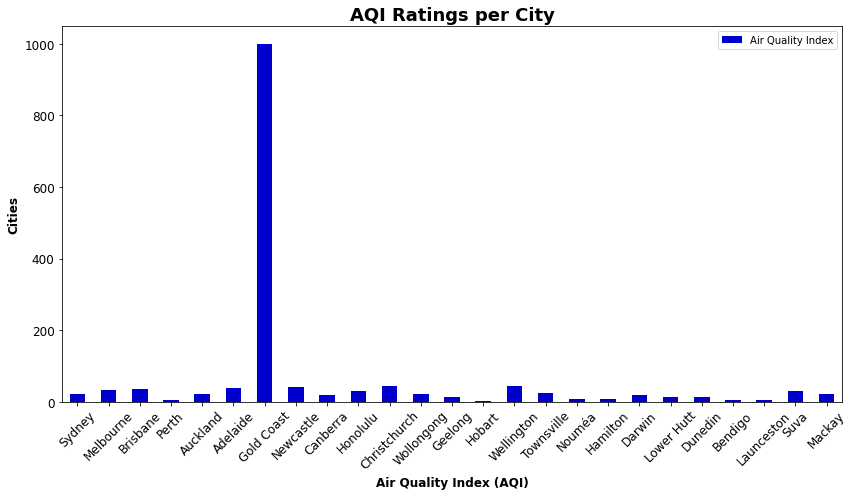

In [14]:
#Remove all rows that does not meet with the requirements for the bar graph
try:
    #Get names of indexes for which column Air Quality Index has text containing "0"
    bar_indexNames = bar_pollution_df[bar_pollution_df['Air Quality Index'] == "0" ].index
    #Delete these row indexes from dataframe
    bar_pollution_df.drop(bar_indexNames , inplace=True)
except:
    #Print to note the code was unsuccessful
    print("Data not found")
    
try:
    #Get names of indexes for which column Air Quality Index has text containing "-"
    bar_indexNames = bar_pollution_df[bar_pollution_df['Air Quality Index'] == "-" ].index
    bar_pollution_df.drop(bar_indexNames , inplace=True)
except:
    print("Data not found")
    
try:
    na_bar_indexNames = na_bar_pollution_df[na_bar_pollution_df['Geolocation'] == "0"].index
    na_bar_pollution_df.drop(na_bar_indexNames, inplace=True)
except:
    print("Data not found")
    
try:
    na_bar_indexNames = na_bar_pollution_df[na_bar_pollution_df['Geolocation'] == "-"].index
    na_bar_pollution_df.drop(na_bar_indexNames, inplace=True)
except:
    print("Data not found")

#Create a bar graph to represents the concentration AQI for corresponding City
bar_pollution_df.plot('City',
                      'Air Quality Index', 
                      kind = 'bar', 
                      figsize = (12,7), 
                      rot = 45,
                      color = 'mediumblue',
                      title = 'AQI Ratings per City in Oceania',
                      fontsize = 12
                   )
plt.xlabel('Air Quality Index (AQI)', fontsize = 12, fontweight = 'bold')
plt.ylabel('Cities', fontsize = 12, fontweight = 'bold')
plt.title('AQI Ratings per City', fontsize = 18, fontweight = 'bold')
plt.tight_layout()
plt.show()

In [15]:
#List the amount of rows and columns
print(bar_pollution_df.shape)

(25, 9)


### CREATE A GMAP CORRESPONDING WITH THE BAR GRAPH DATAFRAME 

In [16]:
#Set the lat&lon to correspond with the bar graph
bar_lat_lon = bar_pollution_df["Geolocation"]

#Customize the size of the figure from gmaps
bar_figure_layout = {
    'width' : '900px',
    'height' : '500px',
    'border' : '1px solid black',
    'padding' : '1px',
    'margin' : '0 auto 0 auto'
}
bar_fig = gmaps.figure(layout = bar_figure_layout)
    
#Add markers to gmaps and display
#Assign the marker layer to a variable
bar_markers = gmaps.marker_layer(bar_lat_lon)
#Add the layer to the map
bar_fig.add_layer(bar_markers)
bar_fig

Figure(layout=FigureLayout(border='1px solid black', height='500px', margin='0 auto 0 auto', padding='1px', wi…

### CREATE A PIE GRAPH TO REPRESENT THE CONTINENT

In [17]:
#Remove all rows that does not meet with the requirements for the pie chart
try:
    #Get names of indexes for which column Carbon Monoxide (μg/m3) has text containing 0
    indexNames = pie_pollution_df[pie_pollution_df['Carbon Monoxide (μg/m3)'] == "0"].index
    #Delete these row indexes from dataFrame
    pie_pollution_df.drop(indexNames , inplace=True)
    #Print to note the code was successful
    print("CO has been found, and row deleted!")
except:
    #Print to note the code was unsuccessful
    print("Data not found")

try:
    indexNames = pie_pollution_df[pie_pollution_df['Hydrogen (μg/m3)'] == "0" ].index
    pie_pollution_df.drop(indexNames , inplace=True)
    print("H has been found, and row deleted!")
except:
    print("Data not found")
    
try:
    indexNames = pie_pollution_df[pie_pollution_df['Ozone (μg/m3)'] == "0" ].index
    pie_pollution_df.drop(indexNames , inplace=True)
    print("O3 has been found, and row deleted!")
except:
    print("Data not found")

try:
    indexNames = pie_pollution_df[pie_pollution_df['Sulphur Dioxide (μg/m3)'] == "0" ].index
    pie_pollution_df.drop(indexNames , inplace=True)
    print("SO2 has been found, and row deleted!")
except:
    print("Data not found")

try:
    indexNames = pie_pollution_df[pie_pollution_df['Fine Particle Matter (μg/m3)'] == "0" ].index
    pie_pollution_df.drop(indexNames , inplace=True)
    print("PM25 has been found, and row deleted!")
except:
    print("Data not found")

try:
    indexNames = pie_pollution_df[pie_pollution_df['Coarse Particulate Matter (μg/m3)'] == "0" ].index
    pie_pollution_df.drop(indexNames , inplace=True)
    print("PM10 has been found, and row deleted!")
except:
    print("Data not found")
    
try:
    pie_indexNames = pie_pollution_df[pie_pollution_df['Geolocation'] == "0" ].index
    pie_pollution_df.drop(pie_indexNames , inplace=True)
    print("lat_lon has been found, and row deleted!")
except:
    print("Data not found")

CO has been found, and row deleted!
H has been found, and row deleted!
O3 has been found, and row deleted!
SO2 has been found, and row deleted!
PM25 has been found, and row deleted!
PM10 has been found, and row deleted!
lat_lon has been found, and row deleted!


In [18]:
#List the amount of rows and columns
print(pie_pollution_df.shape)

(6, 9)


In [19]:
#Create a new list with the pollutants
try:
    new_co = list(pie_pollution_df['Carbon Monoxide (μg/m3)'])
    new_h = list(pie_pollution_df['Hydrogen (μg/m3)'])
    new_o3 = list(pie_pollution_df['Ozone (μg/m3)'])
    new_so2 = list(pie_pollution_df['Sulphur Dioxide (μg/m3)'])
    new_pm25 = list(pie_pollution_df['Fine Particle Matter (μg/m3)'])
    new_pm10 = list(pie_pollution_df['Coarse Particulate Matter (μg/m3)'])
except:
    print("Umm... something went wrong!")

#Calculate the average for each of these columns
try:
    mean_co = statistics.mean(new_co)
    mean_h = statistics.mean(new_h)
    mean_o3 = statistics.mean(new_o3)
    mean_so2 = statistics.mean(new_so2)
    mean_pm25 = statistics.mean(new_pm25)
    mean_pm10 = statistics.mean(new_pm10)
except:
    print("OK... something needs to be checked here...")

#Create a new list for the the average results
mean_oceania = [(mean_co), (mean_h), (mean_o3), (mean_so2), (mean_pm25), (mean_pm10)]

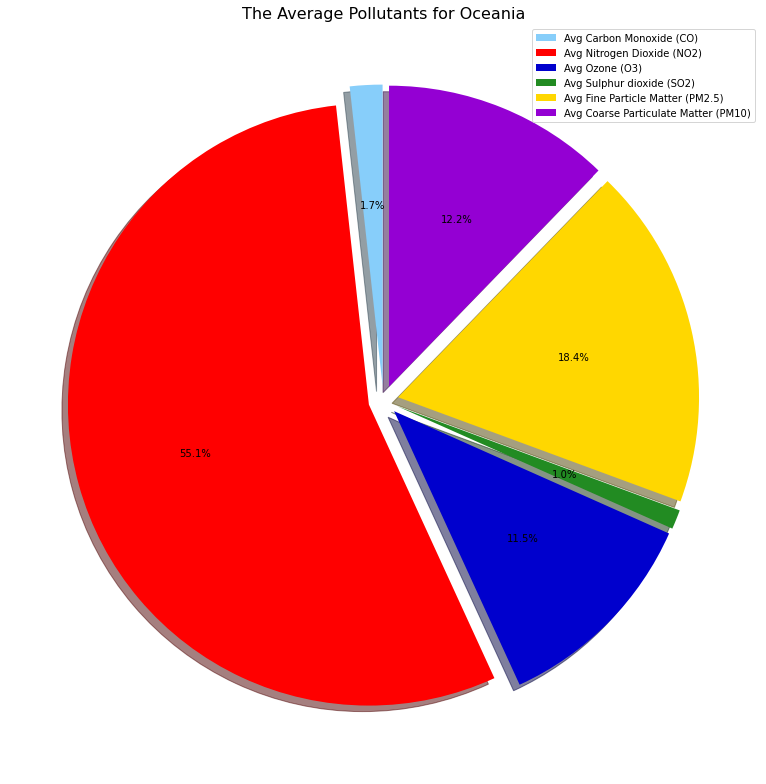

*All values are converted from μg/m3 to AQI levels using the EPA standard
*The Air Quality Index measures the pollutants ['co', 'no2', 'o3', 'so2', 'pm2.5', 'pm10']
*As well as temperature, wind, humidity, and pressure.
*For the sake of comparison, only the pollutant data is collected.


In [20]:
try:
    pollutants = ['co', 'no2', 'o3', 'so2', 'pm2.5', 'pm10']
    values = mean_oceania
except:
    print("")
    print("   ***   Ok, well the problem may be here...   ***   ")
    print("")
    
try:
    labels = pollutants
    colors = ['lightskyblue', 'red', 'mediumblue', 'forestgreen', 'gold', 'darkviolet',]
    explode =(0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
    fig, ax1 = plt.subplots(figsize = (11, 11)) 
    plt.pie(values,
            explode = explode,
            colors = colors,
            startangle = 90,
            autopct = '%.1f%%',
            shadow = True
)
    plt.title("The Average Pollutants for Oceania", fontsize = 16)
    ax1.legend(labels = ['Avg Carbon Monoxide (CO)',
                         'Avg Nitrogen Dioxide (NO2)',
                         'Avg Ozone (O3)',
                         'Avg Sulphur dioxide (SO2)',
                         'Avg Fine Particle Matter (PM2.5)',
                         'Avg Coarse Particulate Matter (PM10)'
],
                loc = 'upper right') 
    plt.tight_layout() 
    plt.show()
    print("*All values are converted from μg/m3 to AQI levels using the EPA standard")
    print(f"*The Air Quality Index measures the pollutants {pollutants}")
    print("*As well as temperature, wind, humidity, and pressure.")
    print("*For the sake of comparison, only the pollutant data is collected.")
except:
    print("")
    print("   ***   Yeah.... you're going to have to restart with a new City  ***   ")
    print("")

### CREATE A GMAP CORRESPONDING WITH THE PIE GRAPH DATAFRAME 

In [21]:
pie_lat_lon = pie_pollution_df["Geolocation"]

#Customize the size of the figure from gmaps
pie_figure_layout = {
    'width' : '900px',
    'height' : '500px',
    'border' : '1px solid black',
    'padding' : '1px',
    'margin' : '0 auto 0 auto'
}
pie_fig = gmaps.figure(layout = pie_figure_layout)
    
#Add markers to gmaps and display
#Assign the marker layer to a variable
pie_markers = gmaps.marker_layer(pie_lat_lon)
#Add the layer to the map
pie_fig.add_layer(pie_markers)
pie_fig

Figure(layout=FigureLayout(border='1px solid black', height='500px', margin='0 auto 0 auto', padding='1px', wi…

### PRINT ALL DATAFRAMES

In [22]:
#Original dataframe
pollution_df

,City,Geolocation,Air Quality Index,Carbon Monoxide (μg/m3),Hydrogen (μg/m3),Ozone (μg/m3),Sulphur Dioxide (μg/m3),Fine Particle Matter (μg/m3),Coarse Particulate Matter (μg/m3)
Rank,,,,,,,,,
1,Sydney,"[-33.872468, 151.213337]",21,2.3,83.8,8,1.5,21,12
2,Melbourne,"[-37.8073959, 144.97]",34,0.7,53,14.5,1.1,34,11
3,Brisbane,"[-27.4848, 153.032]",35,2.8,76.2,0,0,35,22
4,Perth,"[56.399327, -3.434182]",5,0,81.3,0,0,5,2
5,Auckland,"[-36.84742808, 174.7657304]",23,0,62.1,0,0,23,12
6,Adelaide,"[-34.929051, 138.601092]",38,1.3,72,0,0,38,20
7,Gold Coast,"[-27.9612, 153.402]",999,0,65.3,8.6,0,996,999
8,Newcastle,"[-32.93118, 151.7596]",41,0,82.2,0,1.5,41,24
9,Canberra,"[-35.285307, 149.131579]",19,0,67,5.7,0,19,7


In [23]:
#List the amount of rows and columns
print(pollution_df.shape)

(37, 9)


In [24]:
#Bar Graph dataframe
bar_pollution_df

,City,Geolocation,Air Quality Index,Carbon Monoxide (μg/m3),Hydrogen (μg/m3),Ozone (μg/m3),Sulphur Dioxide (μg/m3),Fine Particle Matter (μg/m3),Coarse Particulate Matter (μg/m3)
Rank,,,,,,,,,
1,Sydney,"[-33.872468, 151.213337]",21,2.3,83.8,8,1.5,21,12
2,Melbourne,"[-37.8073959, 144.97]",34,0.7,53,14.5,1.1,34,11
3,Brisbane,"[-27.4848, 153.032]",35,2.8,76.2,0,0,35,22
4,Perth,"[56.399327, -3.434182]",5,0,81.3,0,0,5,2
5,Auckland,"[-36.84742808, 174.7657304]",23,0,62.1,0,0,23,12
6,Adelaide,"[-34.929051, 138.601092]",38,1.3,72,0,0,38,20
7,Gold Coast,"[-27.9612, 153.402]",999,0,65.3,8.6,0,996,999
8,Newcastle,"[-32.93118, 151.7596]",41,0,82.2,0,1.5,41,24
9,Canberra,"[-35.285307, 149.131579]",19,0,67,5.7,0,19,7


In [25]:
#List the amount of rows and columns
print(bar_pollution_df.shape)

(25, 9)


In [26]:
#Pie Chart dataframe
pie_pollution_df

,City,Geolocation,Air Quality Index,Carbon Monoxide (μg/m3),Hydrogen (μg/m3),Ozone (μg/m3),Sulphur Dioxide (μg/m3),Fine Particle Matter (μg/m3),Coarse Particulate Matter (μg/m3)
Rank,,,,,,,,,
1,Sydney,"[-33.872468, 151.213337]",21,2.3,83.8,8,1.5,21,12
2,Melbourne,"[-37.8073959, 144.97]",34,0.7,53,14.5,1.1,34,11
15,Wollongong,"[-34.41706, 150.8873]",22,1.2,81.1,0.8,1.5,22,16
16,Geelong,"[-38.17356, 144.3703]",13,1,52.2,10.4,1.5,12,22
26,Darwin,"[-12.467003, 130.850577]",19,3.4,82.755,3.8,0.7,19,11
34,Suva,"[36.03392, 138.1074268]",30,4.5,61,48.8,1.5,30,20


In [27]:
#List the amount of rows and columns
print(pie_pollution_df.shape)

(6, 9)
